In [ ]:
!pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-7036v2lk
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-7036v2lk
  Resolved https://github.com/huggingface/transformers to commit baa3b22137d9d47097bd5a17736c0639ecf38e5b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install jupyterlab ipywidgets bertviz xformers evaluate matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

# Tokenizers

In [ ]:
from transformers import BertModel, BertTokenizer

modelName = "bert-base-uncased"

tokenizer = BertTokenizer.from_pretrained(modelName)
model = BertModel.from_pretrained(modelName)

In [ ]:
tokenized = tokenizer("I read a good novel.")
print(tokenized)

{'input_ids': [101, 1045, 3191, 1037, 2204, 3117, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
tokens = tokenizer.convert_ids_to_tokens(tokenized["input_ids"])
print(tokens)

['[CLS]', 'i', 'read', 'a', 'good', 'novel', '.', '[SEP]']


# Positional Encoding

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def encodePositions(num_tokens, depth, n=10000):
    positionalMatrix = np.zeros((num_tokens, depth))
    for row in range(num_tokens):
        for col in np.arange(int(depth/2)):
            denominator = np.power(n, 2*col/depth)
            positionalMatrix[row, 2*col] = np.sin(row/denominator)
            positionalMatrix[row, 2*col+1] = np.cos(row/denominator)
    return positionalMatrix

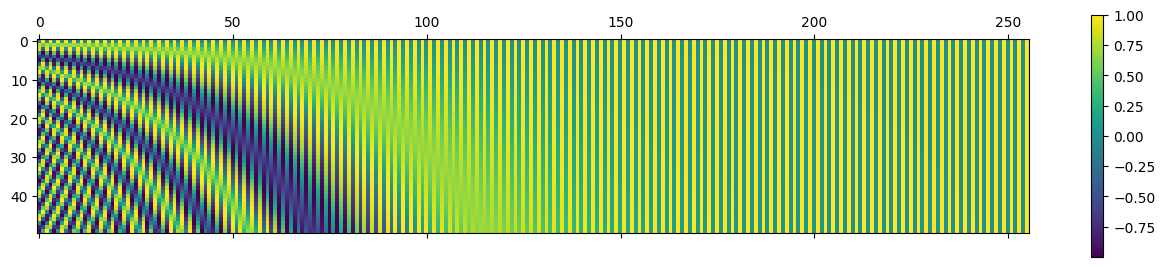

In [ ]:
positionalMatrix = encodePositions(50, 256)
fig = plt.matshow(positionalMatrix)
plt.gcf().colorbar(fig)

# Self-Attention

In [ ]:
from bertviz.transformers_neuron_view import BertModel, BertTokenizer
from bertviz.neuron_view import show

tokenizer_viz = BertTokenizer.from_pretrained(modelName)
model_viz = BertModel.from_pretrained(modelName)
show(model_viz, "bert", tokenizer_viz, "I read a good novel.", display_mode="light", head=11)

100%|██████████| 440473133/440473133 [00:43<00:00, 10127235.56B/s]
/usr/local/lib/python3.10/dist-packages/bertviz/transformers_neuron_view/modeling_utils.py:482: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues rela

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
show(model_viz, "bert", tokenizer_viz, "Attention is a novel idea", display_mode="light", head=11)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Also play with https://huggingface.co/spaces/exbert-project/exbert

# GPT2 model (137M parameters)

In [1]:
from transformers import pipeline
generator = pipeline('text-generation', model='gpt2')
generator("I read a good novel.", max_length=30, num_return_sequences=5)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': 'I read a good novel. I was writing like I had never seen before and I was going to see how long it would take, but when I'},
 {'generated_text': "I read a good novel. Now, I've moved to the United States. And it's a really strong situation where I feel I am in a"},
 {'generated_text': 'I read a good novel. The person I read it with and they had that book and they knew I should also go out and find this book and'},
 {'generated_text': 'I read a good novel.\n\nHe was a young man, quite young, who had heard the "boute d\'homme s'},
 {'generated_text': "I read a good novel. It was as if you would be there the evening after you arrived.\n\nYou wouldn't even know if you had"}]

In [2]:
generator("This movie seemed really long.", max_length=300, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': 'This movie seemed really long. But I also felt like I was working on a new book." – David Duchovny, Director/Studio/Director, MST3K\n\nThe most intense moment of the film was when Besson gets into the shower with his partner.\n\n"We were on set when they were together and it was very tense," Duchovny recalled. He explained the sequence (which was filmed nearly 3 years ago) that allowed for the two of them to get in the shower, and Duchovny made sure to make sure that everyone was already asleep before filming began. "It was amazing to see such freedom," Cervantes added. The scene would go on to be the inspiration for the film\'s sequels and the title track to an upcoming film by Universal.\n\nI asked Besson what he thought of his film adaptation. "The answer should come back when the story is over," Besson said. "I feel the project should have its end of the year premiere next year."\n\nIn the meantime, Cervantes explained how C.R., who died of cancer in 2012, had 

In [3]:
generator("Star Trek" , max_length=100, num_return_sequences=5)


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': 'Star Trek Online, the online game of the same name. This is the final line in the series, written by the series creator and played on Xbox 360 during its development.\n\n\nContents show]\n\nOverview Edit\n\nThe setting of the game is the fictional Federation outpost of the fictional Federation in the "real world" of Star Trek Online. The games world follows the Federation into space and starships are provided as ships. The Star Trek Universe is established by the events of The Next Generation'},
 {'generated_text': 'Star Trek, though, was very much based on its own events and was inspired by and very closely followed by the series\' prequel The Next Generation. [1]\n\nFollowing the release of The Flash, its second season was set in some sort of alternate timeline where the world was already set in 1791. The original story of The Flash was titled "Flashpoint"; the original story was titled The Flash of Star City. The second season of The Flash was reworked from the 

# GPT2-Large model (812M parameters)

In [ ]:
generator = pipeline('text-generation', model='gpt2-large')
generator("I read a good novel.", max_length=30, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I read a good novel. I have seen a good TV series. But I have read a lot of books about politics. And none are better or'},
 {'generated_text': "I read a good novel. It's a collection of short stories. They're very difficult. It's a tough story, a tough genre. I"},
 {'generated_text': 'I read a good novel. I\'ve played a few games and I\'m excited about the future. I also read this book and a book called "'},
 {'generated_text': 'I read a good novel. Now imagine you\'re reading a good novel:\n\n"Sister!"\n\n"Is the boy\'s name?"'},
 {'generated_text': 'I read a good novel. I have been to a great university and one of the top two, or three, in the world. I have a'}]

## Fine-Tuning GPT2

In [4]:
!wget https://raw.githubusercontent.com/huggingface/transformers/main/examples/pytorch/language-modeling/run_clm.py

--2024-12-07 11:35:40--  https://raw.githubusercontent.com/huggingface/transformers/main/examples/pytorch/language-modeling/run_clm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28424 (28K) [text/plain]
Saving to: ‘run_clm.py’

run_clm.py          100%[===================>]  27.76K  --.-KB/s    in 0.001s  

2024-12-07 11:35:40 (18.5 MB/s) - ‘run_clm.py’ saved [28424/28424]



In [5]:
!pip install transformers[torch]

In [ ]:
%%bash

python run_clm.py \
    --model_name_or_path gpt2 \
    --dataset_name imdb \
    --per_device_train_batch_size 8 \
    --per_device_eval_batch_size 8 \
    --do_train \
    --do_eval \
    --output_dir /tmp/test-clm

07/28/2023 18:44:19 - WARNING - __main__ - Process rank: 0, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: False
07/28/2023 18:44:19 - INFO - __main__ - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_

2023-07-28 18:44:17.269873: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/datasets/load.py:2069: FutureWarning: 'use_auth_token' was deprecated in favor of 'token' in version 2.14.0 and will be removed in 3.0.0.
You can remove this warning by passing 'token=None' instead.
  warnings.warn(
No config specified, defaulting to the single config: imdb/plain_text
Loading Dataset Infos from /root/.cache/huggingface/modules/datasets_modules/datasets/imdb/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0
Overwrite dataset info from restored data version if exists.
Loading Dataset info from /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0
Found cached dataset imdb (/root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0)
Loading Dataset info from /root/.cach

In [ ]:
from transformers import pipeline
from transformers import GPT2Tokenizer, GPT2LMHeadModel

dir = "/tmp/test-clm"
generator = pipeline('text-generation', model=GPT2LMHeadModel.from_pretrained(dir), tokenizer=GPT2Tokenizer.from_pretrained(dir))
generator("I read a good novel.", max_length=30, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I read a good novel. I am very interested in it as well as reading it.<br /><br />There are a lot of funny scenes'},
 {'generated_text': "I read a good novel. But that's not how they make it. The original was about something I didn't remember but is always remembered by."},
 {'generated_text': "I read a good novel.The book isn't just a mystery - the cast and story has it all.I'll be honest, while I think"},
 {'generated_text': "I read a good novel. Some of the situations don't bother me really, but they make the film better than a good novel or movie. I"},
 {'generated_text': "I read a good novel. Well, I think this was the last novel I read of my life! I've read a lot of great books,"}]

In [ ]:
generator("This movie seemed really long.", max_length=300, num_return_sequences=5)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'This movie seemed really long. We had two stars. I really thought that\'s what the filmmakers would get from it! <br /><br />I didn\'t agree with the fact that the movie was too fast paced and had too much action, the movie just didn\'t have anything exciting at all.<br /><br />And it just seemed like an empty and boring movie! One actor plays the main villain and the rest just play their roles. And the villain doesn\'t quite stand out as much as the villain did. And that really hurt my enjoyment of the movie.<br /><br />I think this movie is really bad. Too simple and just didn\'t have any exciting action, and some very boring dialogs. It didn\'t make any sense to me. And that really hurt my enjoyment of the movie<br /><br />It was so dull and boring that I wanted to give up watching it. The movie was bad, so I could not believe I was watching something so boring and dull. And that made it seem that you just bought into the bad movie and didn\'t care what happened

In [ ]:
generator("Star Trek", max_length=100, num_return_sequences=5)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Star Trek: The Next Generation - one of the better original series, had its fair share of problems. The episode where Tuvok says that all life is fleeting, and that everyone should go extinct, is a major one. This episode is the worst installment in the Star Trek franchise, it shows what an absolute horrible thing that is about Star Trek. If you don\'t understand the concept before watching, I suggest you read this piece from "The New Yorker", this does not tell the stories,'},
 {'generated_text': 'Star Trek: Deep Space Nine" just isn\'t quite right for an 8-year-old. The plot and costumes are just plain lame, and the dialogue is ridiculous -- especially the one between Spock and "Titanic." What a waste of valuable time. Unfortunately my friends and I spent an hour with the production of the show in the very early 90\'s, so it has been a long time since we have seen a series of similar movies (and only now in the \'70\'s).'},
 {'generated_text': "Star Trek Series -